In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Loading the DataSet

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop(["CustomerID"],axis="columns",inplace=True)

## 3. Performing Visualizations

### 3.1 Univarient Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

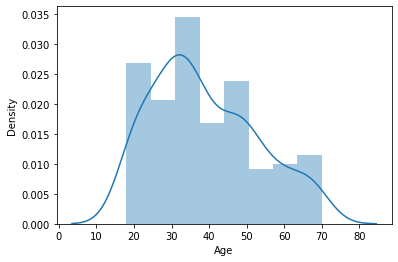

In [4]:
sns.distplot(df.Age)

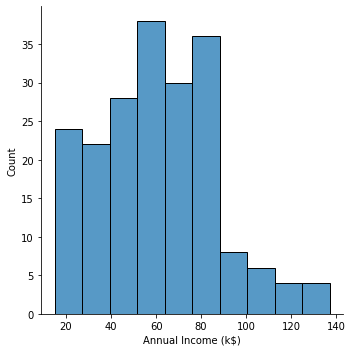

In [5]:
sns.displot(df["Annual Income (k$)"])

### 3.2 Bi-variant Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

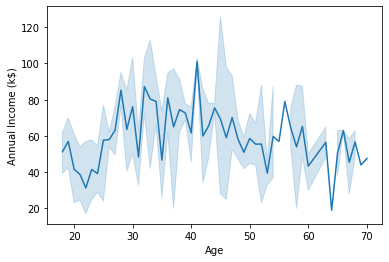

In [6]:
sns.lineplot(df.Age,df["Annual Income (k$)"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

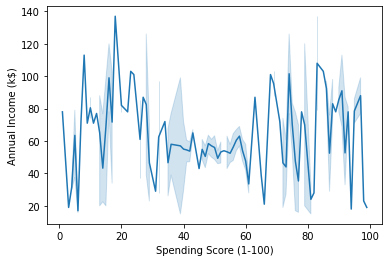

In [7]:
sns.lineplot(df["Spending Score (1-100)"],df["Annual Income (k$)"])

## 4. Perform descriptive statistics on the dataset.

In [8]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 5. Check for Missing values and deal with them.

In [9]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [10]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 6. Find the outliers and replace the outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

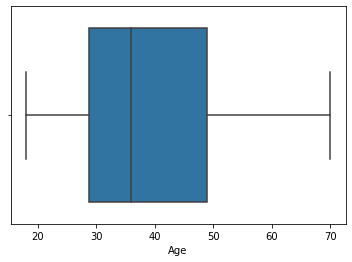

In [11]:
sns.boxplot(df.Age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

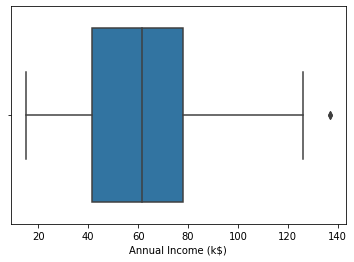

In [12]:
sns.boxplot(df["Annual Income (k$)"])

In [13]:
a99=df["Annual Income (k$)"].quantile(0.99)
a99

126.1099999999999

In [14]:
df["Annual Income (k$)"]=np.where(df["Annual Income (k$)"]>=a99,df["Annual Income (k$)"].median(),df["Annual Income (k$)"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

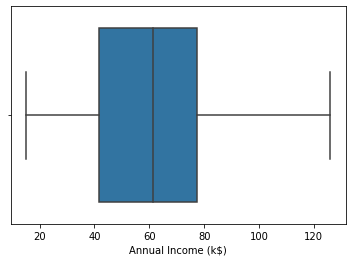

In [15]:
sns.boxplot(df["Annual Income (k$)"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

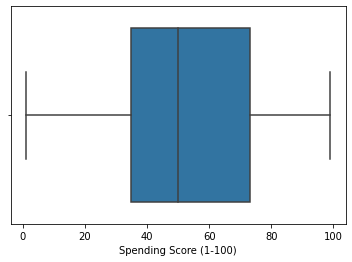

In [16]:
sns.boxplot(df["Spending Score (1-100)"])

## 7. Check for Categorical columns and perform encoding.

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [18]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## 8. Scaling the data

In [19]:
from sklearn.preprocessing import scale
df=pd.DataFrame(scale(df),columns=df.columns)

In [22]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980


## 9. Perform any of the clustering algorithms

In [25]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
model

KMeans(n_clusters=2)

In [26]:
y_predicted=model.fit_predict(df)
y_predicted

C:\Users\Arjun\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

## 10. Add the cluster data with the primary dataset

In [27]:
df["clusters"]=y_predicted
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1.128152,-1.424569,-1.788777,-0.434801,0
1,1.128152,-1.281035,-1.788777,1.195704,0
2,-0.886405,-1.352802,-1.748853,-1.715913,1
3,-0.886405,-1.137502,-1.748853,1.040418,0
4,-0.886405,-0.563369,-1.708930,-0.395980,0
...,...,...,...,...,...
195,-0.886405,-0.276302,2.403201,1.118061,0
196,-0.886405,0.441365,2.642742,-0.861839,1
197,1.128152,-0.491602,2.642742,0.923953,0
198,1.128152,-0.491602,0.067670,-1.250054,1


## 11. Split the data into dependent and independent variables.

In [28]:
x=df.drop("clusters",axis="columns")
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.788777,-0.434801
1,1.128152,-1.281035,-1.788777,1.195704
2,-0.886405,-1.352802,-1.748853,-1.715913
3,-0.886405,-1.137502,-1.748853,1.040418
4,-0.886405,-0.563369,-1.708930,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.403201,1.118061
196,-0.886405,0.441365,2.642742,-0.861839
197,1.128152,-0.491602,2.642742,0.923953
198,1.128152,-0.491602,0.067670,-1.250054


In [29]:
y=df.clusters
y

0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    1
197    0
198    1
199    0
Name: clusters, Length: 200, dtype: int32

## 12. Split the data into training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [31]:
x_train.shape

(160, 4)

In [32]:
x_test.shape

(40, 4)

## 13. Build the Model

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

## 14. Train the Model

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

## 15. Test the Model

In [35]:
lr.score(x_test,y_test)

1.0

In [36]:
lr.score(x_train,y_train)

1.0

## 16. Measure the performance using Evaluation Metrics.

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0],
       [ 0, 21]], dtype=int64)

Text(33.0, 0.5, 'Truth')

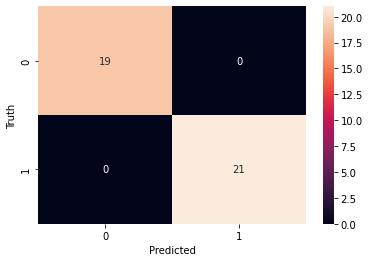

In [38]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

